# CS5990 Project Assignment - [Object Detection]- YOLO training
this assignment contains the YOLO training process

---



#Setup Darknet

##1 Clone Darkent from github
  - here we don't use the author's code
  - author's version: https://github.com/pjreddie/darknet

In [0]:
!rm -r /content/*

In [2]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 10055, done.
remote: Total 10055 (delta 0), reused 0 (delta 0), pack-reused 10055
Receiving objects: 100% (10055/10055), 10.04 MiB | 18.10 MiB/s, done.
Resolving deltas: 100% (6725/6725), done.


##2 Build the code by $make

In [3]:
cd /content/darknet

/content/darknet


In [4]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:228:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
gcc -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘convolution_2d’:
./src/gemm.c:2016:15: warning: unused variable ‘out_w’ [-Wunused-variable]
     const int out_w = (w + 2 * pad - ksize) / stride + 1;    // output_width=input_width for s

##3 Download some weights - YOLO v3 tiny

In [5]:
cd /content/darknet/backup

/content/darknet/backup


In [6]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2019-05-15 00:12:59--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  48.8MB/s    in 0.7s    

2019-05-15 00:13:00 (48.8 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [7]:
#check if the download is done
ls

yolov3-tiny.weights


##4 Test if it works

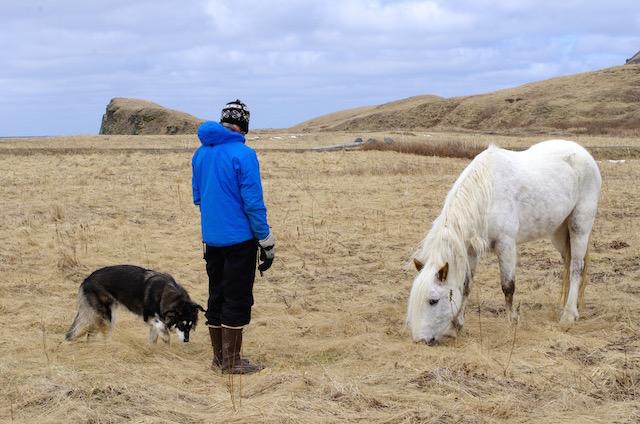

In [8]:
#show the original image
from IPython.display import Image
Image('/content/darknet/data/person.jpg')

In [9]:
cd /content/darknet

/content/darknet


In [10]:
!./darknet detector test /content/darknet/cfg/coco.data /content/darknet/cfg/yolov3-tiny.cfg /content/darknet/backup/yolov3-tiny.weights /content/darknet/data/person.jpg

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

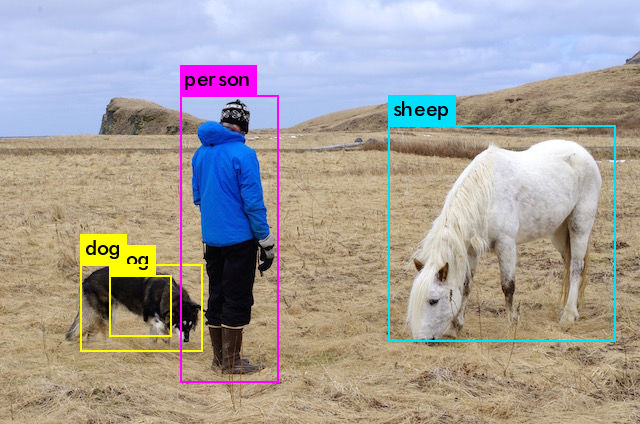

In [11]:
#show the predicted image
# by default it will be in /content/darknet/predictions.jpg
from IPython.display import Image
Image('predictions.jpg')


In [12]:
ls

3rdparty/     CMakeLists.txt          image_yolov3.sh*        README.md
appveyor.yml  CMakeSettings.json      include/                results/
backup/       darknet*                json_mjpeg_streams.sh*  scripts/
build/        DarknetConfig.cmake.in  LICENSE                 src/
build.ps1*    darknet.py              Makefile                video_v2.sh*
build.sh*     darknet_video.py        net_cam_v3.sh*          video_yolov3.sh*
cfg/          data/                   obj/
cmake/        image_yolov2.sh*        predictions.jpg


# Training with Darknet

## 1 Download some image and label, configuration file, and modified makefile

In [13]:
cd /content/darknet

/content/darknet


In [14]:
!git clone https://github.com/sammilei/TempFiles-CS599-demo.git

Cloning into 'TempFiles-CS599-demo'...
remote: Enumerating objects: 676, done.
remote: Counting objects: 100% (676/676), done.
remote: Compressing objects: 100% (434/434), done.
remote: Total 676 (delta 225), reused 672 (delta 221), pack-reused 0
Receiving objects: 100% (676/676), 7.50 MiB | 27.43 MiB/s, done.
Resolving deltas: 100% (225/225), done.


In [15]:
ls /content/darknet/TempFiles-CS599-demo

5_obj.data   5-objs-yolov3-tiny.cfg  Makefile   train-test-split.py
5_obj.names  example_image_label/    Makefile1


##2 Set up training + testing data

### *by default the py file sets 20% for testing

In [16]:
cd /content/darknet/TempFiles-CS599-demo

/content/darknet/TempFiles-CS599-demo


In [17]:
!python /content/darknet/TempFiles-CS599-demo/train-test-split.py /content/darknet/TempFiles-CS599-demo/example_image_label

/content/darknet/TempFiles-CS599-demo
/content/darknet/TempFiles-CS599-demo/example_image_label


In [18]:
# see if train.txt and test.txt are generated
ls /content/darknet/TempFiles-CS599-demo

5_obj.data   5-objs-yolov3-tiny.cfg  Makefile   test.txt             train.txt
5_obj.names  example_image_label/    Makefile1  train-test-split.py


In [19]:
# check how many test and train data
cat test.txt | wc -l

43


In [20]:
cat train.txt| wc -l

175


## 3 training

In [21]:
cd /content/darknet

/content/darknet


In [22]:
!git clone https://github.com/sammilei/TempFiles-CS599-demo.git

fatal: destination path 'TempFiles-CS599-demo' already exists and is not an empty directory.


In [0]:
rm Makefile

In [0]:
cp /content/darknet/TempFiles-CS599-demo/Makefile .

In [0]:
!export PATH=/usr/local/cuda/bin${PATH:+:${PATH}}

In [33]:
!make

chmod +x *.sh
make: *** No rule to make target 'obj/cuda.o', needed by 'darknet'.  Stop.


In [0]:
!export PATH=/usr/local/cuda/bin${PATH:+:${PATH}}

In [35]:
!make

chmod +x *.sh
make: *** No rule to make target 'obj/cuda.o', needed by 'darknet'.  Stop.


In [30]:
!./darknet detector train /content/darknet/TempFiles-CS599-demo/5_obj.data /content/darknet/TempFiles-CS599-demo/5-objs-yolov3-tiny.cfg backup/yolov3-tiny.weights -clear -map > training_output.txt

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

In [28]:
cd /content/darknet

/content/darknet
